In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Data

In [2]:
user_data = pd.read_csv('../../user_features.csv', index_col = 0)


In [68]:
user_data_top = user_data[user_data['num_businesses'] > 30]
# user_data_top = user_data
low_variance_feats = []
for feat in user_data_top.columns:
    # print(f'{feat}:\t {user_data_top[feat].mean()} \t {user_data_top[feat].std()}')
    if user_data_top[feat].std() < 0.1:
        low_variance_feats.append(feat)

In [69]:
len(low_variance_feats)

59

In [70]:
user_top_hivar = user_data_top.drop(low_variance_feats, axis = 1)

In [71]:
corr_matrix = user_top_hivar.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
# df.drop(to_drop, axis=1, inplace=True)

In [72]:
len(to_drop)

9

In [73]:
for feature in to_drop: 
    print(feature +' , ' +upper[feature].idxmax())
    print(upper[feature].max())

Caterers , Barbeque
0.9595260227263585
Chicken Wings , Barbeque
0.9606372768954673
Delis , Caterers
0.9606000981198175
Desserts , Bakeries
0.9557688111458111
Diners , Delis
0.9604382997210662
Specialty Food , Delis
0.953872685401627
Sports Bars , Chicken Wings
0.964133758238003
Sushi Bars , Japanese
0.9816192065635495
RestaurantsCounterService , Diners
0.9798933339457342


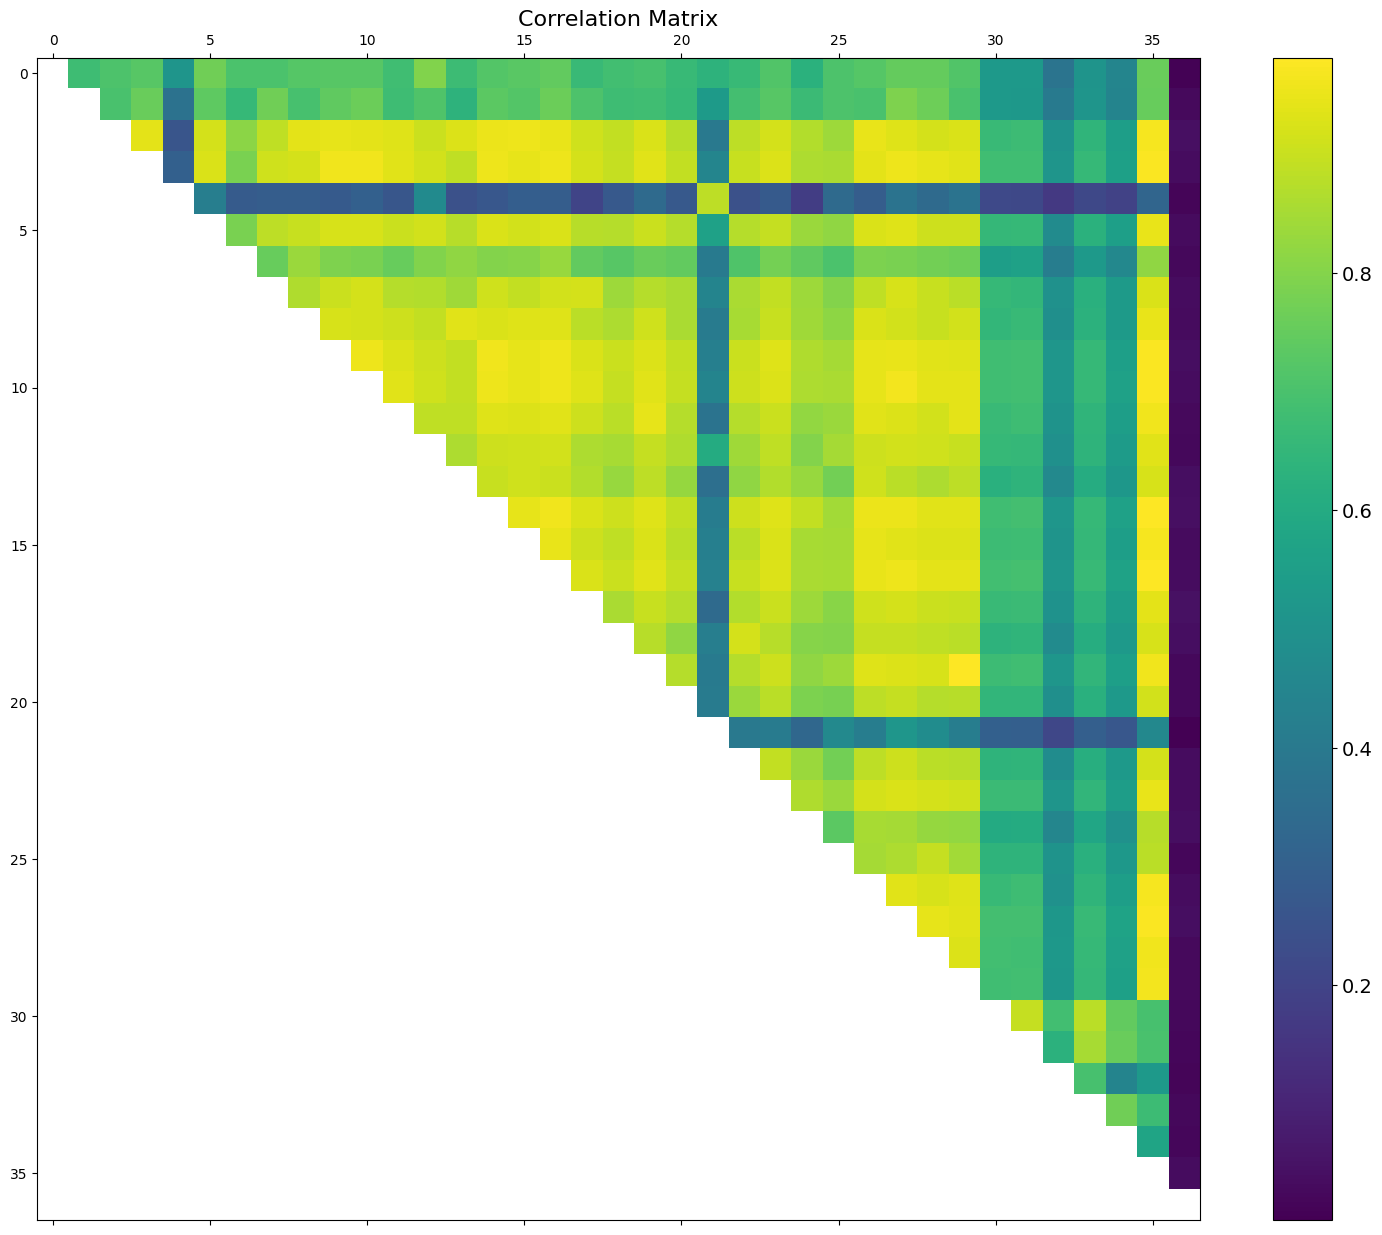

In [74]:
f = plt.figure(figsize=(19, 15))
plt.matshow(upper, fignum=f.number)
# plt.xticks(range(df.select_dtypes(['number']).shape[1]), d.select_dtypes(['number']).columns, fontsize=14, rotation=45)
# plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [75]:
upper

,American (New),American (Traditional),Bakeries,Barbeque,Bars,Beer,Breakfast & Brunch,Burgers,Cafes,Caterers,...,Sports Bars,Steakhouses,Sushi Bars,BusinessAcceptsCreditCards,RestaurantsTakeOut,Alcohol,RestaurantsAttire,GoodForKids,RestaurantsCounterService,num_businesses
American (New),NaN,0.676782,0.709810,0.726076,0.514002,0.769761,0.705490,0.705425,0.723413,0.727941,...,0.749834,0.750954,0.713788,0.532942,0.530520,0.378210,0.509479,0.449352,0.756167,0.008583
American (Traditional),NaN,NaN,0.700637,0.758898,0.370244,0.738387,0.658474,0.768504,0.696917,0.744027,...,0.790975,0.765599,0.698923,0.530362,0.524938,0.404034,0.514021,0.444511,0.755682,0.026739
Bakeries,NaN,NaN,NaN,0.942447,0.258577,0.918673,0.812788,0.886835,0.940815,0.946497,...,0.935619,0.920189,0.927267,0.667706,0.674565,0.502905,0.644771,0.550837,0.969658,0.042584
Barbeque,NaN,NaN,NaN,NaN,0.301174,0.926795,0.783504,0.912319,0.919502,0.959526,...,0.955629,0.943995,0.938975,0.680371,0.682542,0.513714,0.657381,0.557175,0.976862,0.032619
Bars,NaN,NaN,NaN,NaN,NaN,0.419397,0.282347,0.290748,0.290699,0.278028,...,0.374540,0.342024,0.374072,0.219605,0.214777,0.163307,0.213176,0.195094,0.322132,0.013546
Beer,NaN,NaN,NaN,NaN,NaN,NaN,0.783554,0.885228,0.900194,0.921594,...,0.933217,0.906676,0.908591,0.653844,0.659346,0.475129,0.627701,0.554093,0.949641,0.030370
Breakfast & Brunch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.752636,0.836192,0.791719,...,0.783284,0.772997,0.765714,0.552112,0.563473,0.417154,0.533396,0.457651,0.817763,0.022088
Burgers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.864156,0.905041,...,0.922306,0.898371,0.880079,0.658453,0.651424,0.496112,0.624102,0.536428,0.927857,0.034062
Cafes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921628,...,0.914861,0.899989,0.913820,0.650882,0.660938,0.490944,0.631808,0.534203,0.949683,0.031938
Caterers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.949205,0.937901,0.934759,0.681536,0.683128,0.516184,0.656512,0.555934,0.974273,0.039574


## K Means

In [270]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=100)
kmeans.fit(user_top_hivar_nonumbus)

/Users/JuliaYang/Library/CloudStorage/Dropbox/Duke/Spring 2023/STA561/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=100)

In [271]:
user_kmeans_100 = pd.concat([user_top_hivar_nonumbus, pd.Series(kmeans.predict(user_top_hivar_nonumbus), index =user_top_hivar_nonumbus.index, name = 'cluster_id' )], axis = 1)


In [272]:
user_hivar = user_data.drop(low_variance_feats, axis = 1)
user_hivar_nonumbus = user_hivar.iloc[:,:-1]


user_kmeans_100_all = pd.concat([user_hivar_nonumbus, pd.Series(kmeans.predict(user_hivar_nonumbus), index =user_hivar_nonumbus.index, name = 'cluster_id' )], axis = 1)



In [533]:
user_kmeans_100_all.loc[chosen_users]

,American (New),American (Traditional),Bakeries,Barbeque,Bars,Beer,Breakfast & Brunch,Burgers,Cafes,Caterers,...,Sports Bars,Steakhouses,Sushi Bars,BusinessAcceptsCreditCards,RestaurantsTakeOut,Alcohol,RestaurantsAttire,GoodForKids,RestaurantsCounterService,cluster_id
user_id,,,,,,,,,,,,,,,,,,,,,
b'6Q8dQGr_DBKcmQ1aXVWvTQ',-0.140000,-0.280000,-0.160000,-0.260000,-0.130000,-0.220000,-0.070000,-0.290000,-0.210000,-0.190000,...,-0.290000,-0.200000,-0.190000,0.065000,0.050000,0.030000,0.050000,0.030000,-0.230000,3
b'IHNqLX2tHqGzULVYKmpQkw',-0.098361,-0.196721,-0.229508,-0.196721,-0.098361,-0.229508,-0.229508,-0.229508,-0.229508,-0.163934,...,-0.196721,-0.196721,-0.229508,0.016393,0.032787,0.098361,0.049180,0.049180,-0.229508,16
b'1_JeDgLoAcyBL87FAT4xNA',-0.217822,-0.237624,-0.178218,-0.138614,-0.099010,-0.237624,-0.217822,-0.257426,-0.198020,-0.118812,...,-0.198020,-0.158416,-0.217822,0.049505,0.019802,0.039604,0.029703,0.029703,-0.198020,16
b'4wFZgzj4DXB3Mn7Q1WLhXg',-0.231579,-0.231579,-0.210526,-0.273684,-0.126316,-0.273684,-0.126316,-0.189474,-0.294737,-0.294737,...,-0.273684,-0.294737,-0.231579,0.031579,0.042105,0.042105,0.021053,0.021053,-0.294737,3
b'ahnaBpvC29I66u_6JRzQFw',-0.304348,-0.478261,-0.130435,-0.217391,-0.217391,-0.217391,-0.130435,-0.391304,-0.043478,-0.130435,...,-0.130435,-0.217391,0.130435,0.043478,0.043478,-0.086957,-0.043478,-0.043478,-0.130435,16


# DO STUFF FOR Cluster 16

In [289]:
kmeans_100_g16_user_ids = user_kmeans_100[user_kmeans_100['cluster_id'] == 16].index

In [290]:
kmeans_100_g16_users = user_hivar.loc[kmeans_100_g16_user_ids]
print(len(kmeans_100_g16_user_ids))

162


# DO STUFF FOR Cluster 3

In [538]:
kmeans_100_g3_user_ids = user_kmeans_100[user_kmeans_100['cluster_id'] == 3].index

In [539]:
kmeans_100_g3_users = user_hivar.loc[kmeans_100_g3_user_ids]
print(len(kmeans_100_g3_user_ids))

228


In [153]:
# chosen_user_low = np.random.choice(kmeans6_users[kmeans6_users['num_businesses']== 23].index)

## OPTICS

In [76]:
# Authors: Shane Grigsby <refuge@rocktalus.com>
#          Adrin Jalali <adrin.jalali@gmail.com>
# License: BSD 3 clause

from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import StandardScaler
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np


In [77]:
# X = StandardScaler().fit_transform(user_top_hivar)
# user_top_hivar_standard = pd.DataFrame(X,columns = user_top_hivar.columns, index = user_top_hivar.index)

In [78]:
user_top_hivar_nonumbus = user_top_hivar.iloc[:,:-1]

In [79]:
# user_top_hivar_nonumbus_13k =  user_top_hivar_nonumbus.loc[np.random.choice(user_top_hivar_nonumbus.index, 13000)]

In [80]:
clust = OPTICS(cluster_method = 'xi',  xi=0.0001, eps =0.8, min_cluster_size=30)

# Run the fit
clust.fit(user_top_hivar_nonumbus)
labels = clust.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 9961


In [81]:
for val in np.unique(labels): 
    print(f'{val} \t {list(labels).count(val)}')

-1 	 9961
0 	 33
1 	 32
2 	 39
3 	 44


In [82]:
user_clustered = pd.concat([user_top_hivar_nonumbus, pd.Series(labels, index =user_top_hivar_nonumbus.index, name = 'cluster_id' )], axis = 1)



## Define Clusters

In [89]:
cluster_3 = user_clustered[user_clustered['cluster_id'] == 3]
cluster_3_users = cluster_3.index

In [ ]:
cluster_3.to_csv('largest_cluster.csv')

In [88]:
cluster_2 = user_clustered[user_clustered['cluster_id'] == 2]
cluster_2_users = cluster_2.index

In [26]:
cluster_2.to_csv('second_cluster.csv')

In [87]:
cluster_1 = user_clustered[user_clustered['cluster_id'] == 1]
cluster_1_users = cluster_1.index

In [ ]:
cluster_1.to_csv('third_cluster.csv')

In [86]:
cluster_0 = user_clustered[user_clustered['cluster_id'] == 0]
cluster_0_users = cluster_0.index

In [ ]:
cluster_0.to_csv('last_cluster.csv')

## Create data for Regression

In [131]:
from sklearn.model_selection import train_test_split

In [122]:
user_bus_final = pd.read_csv('../../user_bus_final.csv', index_col = 0, low_memory = False)

In [123]:
business_data = pd.read_csv('../Business_Related/julia_business_data.csv', index_col = 0, low_memory = False)

In [48]:
business_data = business_data.iloc[:,9:]

In [297]:
kmeans_100_g16_df = pd.DataFrame()
for index in tqdm.tqdm(kmeans_100_g16_user_ids):
    row = user_bus_final.loc[index]
    for ranking in [1,2,3,4,5]:
        if row[str(ranking)]== row[str(ranking)]:
            buses =  eval(row[str(ranking)])
            for business in buses: 
                new_data = business_data.loc[business].copy()
                new_data.loc['rating'] = ranking
                kmeans_100_g16_df = pd.concat([kmeans_100_g16_df, new_data], axis = 1)
kmeans_100_g16_df = kmeans_100_g16_df.transpose()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 162/162 [05:39<00:00,  2.10s/it]


In [300]:
# ensemble_user_data = {}
# for user in chosen_users: 
#     ensemble_user_data[user] = {}
#     ensemble_user_data[user]['train'] = pd.read_csv(f'../ensemble_users/train/user_{user}_train.csv', index_col = 0)
#     ensemble_user_data[user]['test'] = pd.read_csv(f'../ensemble_users/test/user_{user}_test.csv', index_col = 0)
#     ensemble_user_data[user]['close'] = pd.read_csv(f'../ensemble_users/closest/user_{user}_50_close.csv', index_col = 0)
    
    

In [341]:
test_bus = []

for user in chosen_users: 
    if user in kmeans_100_g16_user_ids:
        test_bus+=(list(ensemble_user_data[user]['test'].index))
    

In [344]:
set(test_bus).difference( set(kmeans_100_g16_df.index))

set()

In [345]:
train_bus = set(kmeans_100_g16_df.index).difference(test_bus).difference(close_bus)

In [369]:
X_train = kmeans_100_g16_df.loc[list(train_bus)].iloc[:,9:-1].astype(int)
y_train = kmeans_100_g16_df.loc[list(train_bus)].iloc[:,-1].astype(int)

X_test = kmeans_100_g16_df.loc[list(test_bus)].iloc[:,9:-1].astype(int)
y_test = kmeans_100_g16_df.loc[list(test_bus)].iloc[:,-1].astype(int)


## Regress for Cluster 3

In [545]:
# kmeans_100_g3_df = pd.DataFrame()
to_concat = []
for index in tqdm.tqdm(kmeans_100_g3_user_ids):
    row = user_bus_final.loc[index]
    for ranking in [1,2,3,4,5]:
        if row[str(ranking)]== row[str(ranking)]:
            buses =  eval(row[str(ranking)])
            for business in buses: 
                new_data = business_data.loc[business].copy()
                new_data.loc['rating'] = ranking
                to_concat.append(new_data)
kmeans_100_g3_df = pd.concat(to_concat, axis = 1)
kmeans_100_g3_df = kmeans_100_g3_df.transpose()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 228/228 [00:02<00:00, 113.45it/s]


In [547]:
test_bus = []

for user in chosen_users: 
    if user in kmeans_100_g3_user_ids:
        test_bus+=(list(ensemble_user_data[user]['test'].index))
        close_bus+=(list(ensemble_user_data[user]['close'].index))
    

In [548]:
set(test_bus).difference( set(kmeans_100_g3_df.index))

set()

In [549]:
train_bus = set(kmeans_100_g3_df.index).difference(test_bus).difference(close_bus)

In [550]:
X_train = kmeans_100_g3_df.loc[list(train_bus)].iloc[:,9:-1].astype(int)
y_train = kmeans_100_g3_df.loc[list(train_bus)].iloc[:,-1].astype(int)

X_test = kmeans_100_g3_df.loc[list(test_bus)].iloc[:,9:-1].astype(int)
y_test = kmeans_100_g3_df.loc[list(test_bus)].iloc[:,-1].astype(int)


In [41]:
# X2_train, X2_test,y2_train, y2_test = train_test_split(kmeans_100_g16_df.iloc[:,:-1], chosen_cluster2_df.iloc[:,-1], test_size=0.1, train_size=0.9, random_state=42, shuffle=True, stratify = kmeans_100_g16_df.iloc[:,-1])


## Train Regression and Predict

In [551]:
n_samples = 2754
n_classes = 5

print(n_samples/(n_classes * np.bincount(y_train)))

[       inf 0.42631579 0.24512684 0.13657327 0.12917448 0.2372093 ]


/var/folders/tx/hcj75l151gjcmpfyz6qmnlxm0000gn/T/ipykernel_86047/3858317002.py:4: RuntimeWarning: divide by zero encountered in divide
  print(n_samples/(n_classes * np.bincount(y_train)))


In [43]:
# weights = {1:2.6,2:1.9,3:.83,4:0.8,5:.9 }

In [612]:
weights = {1:.41, 2:.25, 3:.14, 4:0.133, 5:.24}

In [613]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

clf = LogisticRegressionCV(Cs = [1e-3, 1e-2, 1e-1, 1],random_state=0, class_weight = weights)
clf.fit(X_train, y_train)
# clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
# clf = Lasso(alpha=0.00001).fit(X_train, y_train)
# clf = LinearRegression().fit(X_train,y_train)

y_pred = clf.predict(X_test)

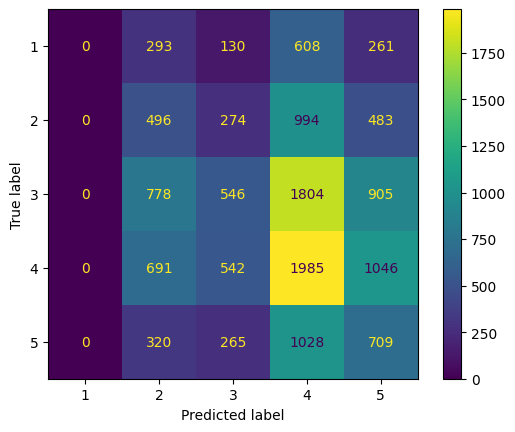

In [614]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf_matrix = confusion_matrix(y_train,clf.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,
                              display_labels=[1,2,3,4,5])
disp.plot()

plt.show()

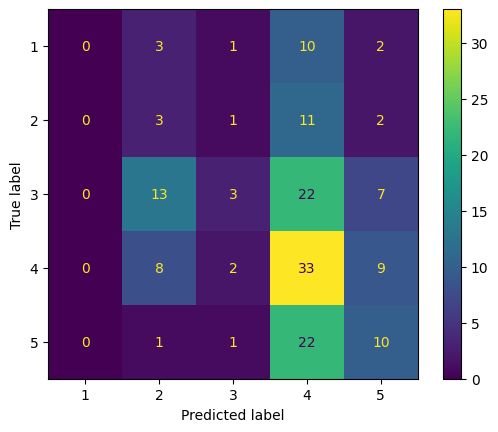

In [615]:
cf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,
                              display_labels=[1,2,3,4,5])
disp.plot()

plt.show()

## Predict for close

In [616]:
close_bus = []
for user in chosen_users: 
    if user in kmeans_100_g3_user_ids:
        print(user)
        close_bus=(list(ensemble_user_data[user]['close'].index))
    
        X_close = business_data.loc[list(close_bus)].iloc[:,9:]
        y_pred_close = clf.predict_proba(X_close)
        vals = pd.DataFrame(np.sum(y_pred_close * [-2,-1,0,1,2], axis = 1), index = X_close.index, columns = ['rating'])
        # vals['pred'] = clf.predict(X_close)
        vals = vals.sort_values(by=['rating'], ascending = False)
        vals['ranking'] = np.arange(1,51)
        final = pd.concat([business_data.loc[vals.index].iloc[:,:6], vals['ranking']], axis = 1)
        final.to_csv(f'../ensemble_users/user_cluster_rankings/user_{user}_UCLR_ranking.csv')

b'6Q8dQGr_DBKcmQ1aXVWvTQ'
b'4wFZgzj4DXB3Mn7Q1WLhXg'


In [536]:
user = chosen_users[4]
close_bus=(list(ensemble_user_data[user]['close'].index))

X_close = business_data.loc[list(close_bus)].iloc[:,9:]
y_pred_close = clf.predict_proba(X_close)
vals = pd.DataFrame(np.sum(y_pred_close * [-2,-1,0,1,2], axis = 1), index = X_close.index, columns = ['rating'])
# vals['pred'] = clf.predict(X_close)
vals = vals.sort_values(by=['rating'], ascending = False)
vals['ranking'] = np.arange(1,51)
final = pd.concat([business_data.loc[vals.index].iloc[:,:6], vals['ranking']], axis = 1)
final.to_csv(f'../ensemble_users/user_cluster_rankings/user_{user}_UCLR_ranking.csv')

## Make CSVs for cluster 3 users

In [128]:
from tqdm import tqdm
tqdm.pandas()

In [172]:
# chosen_users = np.random.choice(cluster_3.index, 4)
chosen_users = ["b'6Q8dQGr_DBKcmQ1aXVWvTQ'", "b'IHNqLX2tHqGzULVYKmpQkw'", "b'1_JeDgLoAcyBL87FAT4xNA'", "b'4wFZgzj4DXB3Mn7Q1WLhXg'", "b'ahnaBpvC29I66u_6JRzQFw'"]

In [119]:
user_top_hivar.loc[chosen_users]['num_businesses']

user_id
b'6Q8dQGr_DBKcmQ1aXVWvTQ'    200
b'IHNqLX2tHqGzULVYKmpQkw'     61
b'1_JeDgLoAcyBL87FAT4xNA'    101
b'4wFZgzj4DXB3Mn7Q1WLhXg'     95
Name: num_businesses, dtype: int64

In [134]:
def make_user_csvs(row):
    df = pd.DataFrame()
    for ranking in [1,2,3,4,5]:
        if row[str(ranking)]== row[str(ranking)]:
            buses =  eval(row[str(ranking)])
            for business in buses: 
                new_data = business_data.loc[business]
                new_data['rating'] = ranking
                df = pd.concat([df, new_data], axis = 1)
                
    train_df, test_df = train_test_split(df.transpose(), train_size = 0.8, test_size = 0.2, random_state=42, shuffle=True)

    train_df.to_csv(f'../ensemble_users/train/user_rf_{row.name}_{len(df.columns)}_train.csv')
    test_df.to_csv(f'../ensemble_users/test/user_rf_{row.name}_{len(df.columns)}_test.csv')
    
    loc_center = (df.loc['latitude'].median(), df.loc['longitude'].median())
    business_lat_longs
    return row

In [174]:
selected_users = user_bus_final.loc[chosen_users]
# selected_users.progress_apply(make_user_csvs, axis = 1)

## Make 50 closest rests

In [187]:
test_df = pd.read_csv(f'../ensemble_users/train/user_rf_{chosen_user_low}_{23}_train.csv', index_col = 0).transpose()


In [189]:
test_df.loc['latitude'].median()

38.599375889849995

In [190]:
test_df.loc['latitude'].median()

38.599375889849995

In [194]:
business_lat_longs = pd.concat([business_data['latitude'], business_data['longitude']], axis = 1)

In [196]:
list(business_lat_longs.iloc[0])

[39.9555052, -75.1555641]

In [222]:
pd.DataFrame.from_dict(distances, orient='index')

,0
MTSW4McQd7CbVtyjqoe9mw,5584.774679
CF33F8-E6oudUQ46HnavjQ,6203.327363
bBDDEgkFA1Otx9Lfe7BZUQ,6196.688984
eEOYSgkmpB90uNA7lDOMRA,6476.904373
il_Ro8jwPlHresjw9EGmBg,5989.243321
...,...
w_4xUt-1AyY2ZwKtnjW0Xg,6495.267985
l9eLGG9ZKpLJzboZq-9LRQ,5592.025782
cM6V90ExQD6KMSU3rRB5ZA,6496.631459
WnT9NIzQgLlILjPT0kEcsQ,5585.846290


In [229]:
from geopy.distance import distance

In [244]:
business_dists = pd.DataFrame()

In [269]:
business_lat_longs = pd.concat([business_data['latitude'], business_data['longitude']], axis = 1)
for user in chosen_users: 
    train_df = pd.read_csv(f"../ensemble_users/train/user_rf_{user}_{user_data['num_businesses'].loc[user]}_train.csv", index_col = 0)
    test_df = pd.read_csv(f"../ensemble_users/test/user_rf_{user}_{user_data['num_businesses'].loc[user]}_test.csv", index_col = 0)

    visited_df = pd.concat([train_df, test_df], axis = 0).transpose()

    center = (visited_df.loc['latitude'].median(), visited_df.loc['longitude'].median()) 
    distances = {}
    for business in business_lat_longs.index:
        bus_lat_long = list(business_lat_longs.loc[business])
        distances[business] = float(distance(center, bus_lat_long).miles)
    business_dists[user] = pd.DataFrame.from_dict(distances, orient='index')
    
    
    df = pd.DataFrame()
    already_visited = visited_df.columns
    
    close_businesses = business_dists.drop(already_visited).nsmallest(50, user).index
    for business in close_businesses: 
        new_data = business_data.loc[business]
        df = pd.concat([df, new_data], axis = 1)
    df.transpose().to_csv(f'../ensemble_users/closest/user_{user}_{len(df.columns)}_close.csv')


In [257]:
for user in chosen_users: 
    df = pd.DataFrame()
    alread_visited = 
    close_businesses = business_dists.drop(already_visited).nsmallest(50, user).index
    for business in close_businesses: 
        new_data = business_data.loc[business]
        df = pd.concat([df, new_data], axis = 1)
    df.transpose().to_csv(f'../ensemble_users/closest/user_{user}_{len(df.columns)}_close.csv')

In [256]:
df.transpose()

,name,address,city,state,latitude,longitude,stars,review_count,categories,is_American,...,is_Coffee & Tea,is_Asian,is_Italian,"is_Healthy,Specialty Food",is_Latin American,is_Mediterranean,is_Western European,is_Slavic Food,is_African,is_Food Markets/Shops
TJ4tXO0qGsLwyxTaj_Jspw,Wok 'N Roll,807 W Evesham Ave,Magnolia,NJ,39.851088,-75.048443,3.5,32,"Seafood, Restaurants, Soup, Chinese",1,...,0,1,0,0,0,0,0,0,0,1
lNOab7pDoLn6tVkksgKQYQ,La Matta Pizza,681 E Evesham Rd,Runnemede,NJ,39.849285,-75.057327,2.5,25,"Pizza, Restaurants, Wraps, Chicken Wings, Italian",1,...,0,0,1,1,0,0,0,0,0,0
OcPVoTYp3x-Dc1ZmIQ4lcQ,Fratelli's Pizza,307 E Evesham Rd,Runnemede,NJ,39.847125,-75.063314,2.5,33,"Pizza, Restaurants",0,...,0,0,1,0,0,0,0,0,0,0
oeOKkk67d3NTCXl24HOp2w,State of New Jersey Motor Vehicle Comission,"835 E Clements Bridge Rd, Runnemede Plaza",Runnemede,NJ,39.857125,-75.063596,2.5,19,"Public Services & Government, Restaurants, Piz...",0,...,0,0,1,0,0,0,0,0,0,0
StlMQ9_9Vk5vH2BHKaQRaA,Oishi Sushi Japanese & Chinese Food,"835 E Clements Bridge Rd, Ste 6",Runnemede,NJ,39.857167,-75.063761,4.0,11,"Japanese, Chinese, Restaurants",0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xqrlUnrLo1t9UP38S02qeg,Park Avenue Coffee - The Hill,5105 Columbia Ave,Saint Louis,MO,38.610889,-90.272589,4.5,124,"Cafes, Coffee & Tea, Restaurants, Bakeries, Fo...",1,...,1,0,0,1,0,0,0,0,0,0
nOdCrgxnVzefnpU1jmhvKQ,China Dish,4935 Sw Ave,Saint Louis,MO,38.612417,-90.26862,3.5,35,"Restaurants, Chinese",0,...,0,1,0,0,0,0,0,0,0,0
TXuAuEWYISQjqv7Z_fHI7w,Taft Street Restaurant and Bar,4457 Gravois Ave,Saint Louis,MO,38.5853,-90.262353,4.0,16,"Bars, Restaurants, Nightlife",0,...,0,0,0,0,0,0,0,0,0,0
iay91CweEOzRIW6wjcOjuA,Truc Lam,3737 Gravois Ave,Saint Louis,MO,38.591977,-90.247972,4.5,170,"Restaurants, Vietnamese",0,...,0,1,0,0,0,0,0,0,0,0


In [266]:
train_df = pd.read_csv(f"../ensemble_users/train/user_rf_{user}_{user_data['num_businesses'].loc[user]}_train.csv", index_col = 0)
test_df = pd.read_csv(f"../ensemble_users/test/user_rf_{user}_{user_data['num_businesses'].loc[user]}_test.csv", index_col = 0)

visited_df = pd.concat([train_df, test_df], axis = 0).transpose()


In [267]:
visited_df

,Dv0tENo7Ug1duvNS2hltBw,u4M4SxqehnyMI5vs9HaW7Q,_-XYJgVGrNMtn_S6nPm-GQ,4xsJN2FuB94w9rMoMo6XFQ,7D5-a53BLau19RpMu-L3zg,zvcyW3ZtPYWziX7k9tCFBg,a1GY-xy-PKrPXlMbhBv5ZA,utJRw1T1_zjBuCIFFIbe-w,XmpbEmS7PRdg5sIbGpjt7g,vzG8THG9K2lDu-Ah6vFAVA,...,1LEkH6fV3Oa-4xYShrPE0g,BOjpe0u5u_cm9SWMS2KLFg,s7JxSEtIumoFod2Jdj0_-g,DMlBzp6bs_f8WK8xQQvZWQ,eQlMjyOsirwFCH8CiaKrjw,PuCdocg7eh_IwSqhip_qUQ,TLgAn7ZuoqeXppNSEjyjkQ,ASBUT6w6lyoDuFwzoN9yfw,FryXEasH74MQDnj5Bvz3QA,faReoVCPuY0XUE3CSIVsAg
name,Tucker's Place South,The Dam,Vinnie's Italian Beef and Gyros,Spare No Rib,Beachbum Berry's Latitude 29,Bo Fung Chinese Kitchen,Onesto Pizza & Trattoria,Sasha's,The Boathouse at Forest Park,Café Piazza,...,Joanie's To Go,Stacked STL,Reifschneider's Grill & Grape,Mariachis II Mexican Restaurant,Fitz's SoCo,Mama Mel's Pizzeria,Hi-Pointe Drive-In,Al's Steak House,The Mud House,Sushi Hana
address,3939 Union Rd,3173 Morgan Ford Rd,3208 Ivanhoe Ave,2200 Gravois Ave,321 N Peters St,6810 Gravois Ave,5401 Finkman St,706 De Mun Ave,6101 Government Dr,1900 Arsenal St,...,804 Russell Blvd,7637 Ivory Ave,608 N Main St,4625 Gravois Ave,5244 S Lindbergh Blvd,1200 Telegraph Rd,951 S Kirkwood Rd,1200 N 1st St,2101 Cherokee St,8809 Gravois Rd
city,Saint Louis,Saint Louis,Saint Louis,Saint Louis,New Orleans,Saint Louis,Saint Louis,Saint Louis,Saint Louis,Saint Louis,...,Saint Louis,Saint Louis,Columbia,Saint Louis,Sappington,Saint Louis,Kirkwood,Saint Louis,Saint Louis,Affton
state,MO,MO,MO,MO,LA,MO,MO,MO,MO,MO,...,MO,MO,IL,MO,MO,MO,MO,MO,MO,MO
latitude,38.510649,38.601974,38.60549,38.606144,29.953715,38.570893,38.576575,38.638361,38.64007,38.596777,...,38.606,38.549113,38.447653,38.583527,38.527358,38.532609,38.566961,38.635432,38.592947,38.556305
longitude,-90.331607,-90.261671,-90.303558,-90.219669,-90.065134,-90.283998,-90.286838,-90.307736,-90.284871,-90.217867,...,-90.2046,-90.262276,-90.20393,-90.264847,-90.36626,-90.286768,-90.407493,-90.182389,-90.222144,-90.310722
stars,3.5,3.5,4.5,4.5,4.0,4.0,4.0,4.0,3.0,4.0,...,3.5,4.5,3.5,4.5,4.0,4.5,3.0,3.5,4.5,4.5
review_count,224,300,188,257,389,218,286,264,403,164,...,59,712,85,183,143,41,29,65,1015,141
categories,"Steakhouses, Pizza, Restaurants","Sandwiches, American (Traditional), Burgers, R...","Restaurants, Italian, Greek","Mexican, Tacos, Barbeque, Bars, American (Trad...","Hawaiian, Tiki Bars, Gastropubs, Bars, Nightli...","Chicken Wings, Chinese, Restaurants, Asian Fusion","Event Planning & Services, Pizza, Italian, Res...","Breakfast & Brunch, Bars, American (New), Nigh...","Boating, Active Life, Caterers, Local Flavor, ...","Cafes, Italian, Pizza, Restaurants, Breakfast ...",...,"Restaurants, Italian, Pizza, American (Traditi...","Restaurants, Desserts, Food, Bars, American (T...","Pizza, American (Traditional), Nightlife, Bars...","Mexican, Restaurants, Tex-Mex","Burgers, Restaurants, Desserts, American (Trad...","Italian, Sandwiches, Restaurants, Salad, Pizza...","Ice Cream & Frozen Yogurt, Food, Burgers, Rest...","Restaurants, Steakhouses, Seafood","Food, Breakfast & Brunch, Coffee & Tea, Restau...","Sushi Bars, Restaurants"
is_American,1,1,0,1,0,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,0
